In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [2]:
def print_metric(y_test,y_predict):
    print('Recall Score:'+str(recall_score(y_test,y_predict)))
    print('Precision Score:'+str(precision_score(y_test,y_predict)))
    print('F1 Score:'+str(f1_score(y_test,y_predict)))
    print('Accuracy Score:'+str(accuracy_score(y_test,y_predict)))

In [40]:
def plot_correlationMatrix(corr_matrix,s1,s2,annotTrue=True):
    sns.set_context(font_scale=3)
    f, ax = plt.pyplot.subplots(figsize=(s1, s2))
    cmap = sns.diverging_palette(250, 15, as_cmap=True)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    ax=sns.heatmap(corr_matrix,mask=mask,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=annotTrue,annot_kws={"size":20})
    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    size=30);
    ax.set_yticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    size=30);

In [4]:
def run_ml_models(X,y):
    logistic_regression_classifier= LogisticRegression()
    naive_bayes_classifier=GaussianNB()
    svm_classifier=SVC()
    decision_tree_classifier=tree.DecisionTreeClassifier()
    random_forest_classifier=RandomForestClassifier(random_state=0)
    
    classfiers={"Logistic Regression Classifier":logistic_regression_classifier,"Naive Bayes Classifier":naive_bayes_classifier,
                "Support Vector Machine":svm_classifier,"Descision Tree Classfier":decision_tree_classifier,"Random Forest Classifier":random_forest_classifier}
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,stratify=y)
    
    for classfier_name, classfier in classfiers.items():
        print(classfier_name+" Metrics")
        print("---------------------------")
        classfier.fit(X_train,y_train)
        classifier_pred=classfier.predict(X_test)
        print_metric(y_test,classifier_pred)
        print("---------------------------")

In [5]:
mushroom_df=pd.read_csv('mushrooms.csv')

In [6]:
#lets first check the data and look at the data frame.
mushroom_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [7]:
mushroom_df['veil-type'].unique()

array(['p'], dtype=object)

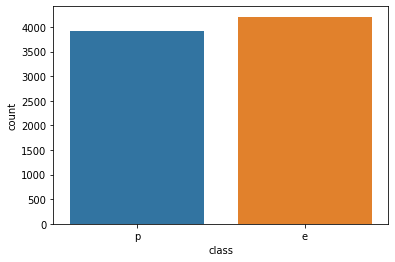

In [8]:
#lets check whether there is any imbalance between the data.
ax=sns.countplot(x="class",data=mushroom_df)

There seems to be a slight imbalance data with the edible mushrooms to be more in number than the poisonous ones. We must note this and keep the performance metrics as the F1  Score.


In [9]:
#lets check the general info of the dataframe.
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

So there total 8124 entries and there seem to be no null values. This is good for the data as there is no need to handle null values.

One challenge we face here is that we all the data types as object datatype.
This is a considerable issue as ML classifiers do not process object data.
In order to work with this data we first need to convert it into equivalent numeric values.

For this task we need to first figure out what's the type of categorical data is present.

There are two types of categorical data:
Ordinal Data: Where there is a definite rank or order to the categories of the data. For example, small large and XL sized tshirt data is ordinal as these can be ranked.
Nominal Data where there is no specific order to the data.

One more closer inspection most of the data looks nominal. So we can go ahead with the One Hot Encoding.


In [10]:
#We first convert the data into numeric encoding method the Label Encoding
labelEncoder=LabelEncoder()


In [11]:
for column in mushroom_df.columns:
    mushroom_df[column]=labelEncoder.fit_transform(mushroom_df[column])
    
    

In [12]:
#now lets see the what the datatypes of each paramter look like
mushroom_df.info()

#we can see that the data is now in numeric format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null int32
cap-shape                   8124 non-null int32
cap-surface                 8124 non-null int32
cap-color                   8124 non-null int32
bruises                     8124 non-null int32
odor                        8124 non-null int32
gill-attachment             8124 non-null int32
gill-spacing                8124 non-null int32
gill-size                   8124 non-null int32
gill-color                  8124 non-null int32
stalk-shape                 8124 non-null int32
stalk-root                  8124 non-null int32
stalk-surface-above-ring    8124 non-null int32
stalk-surface-below-ring    8124 non-null int32
stalk-color-above-ring      8124 non-null int32
stalk-color-below-ring      8124 non-null int32
veil-type                   8124 non-null int32
veil-color                  8124 non-null int32
ring-number                 8

In [13]:
#Now that the data is encoded lets see how the data is correlated with each other
corr_matrix=mushroom_df.corr()
#An issue with veil-type encountered that the encoding converts it into one class i.e is 0 so in coorelation
#the correlation factor is coming to be 0.
corr_matrix=corr_matrix.fillna(0)

In [14]:
corr_matrix

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,0.0,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,0.0,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,0.0,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,0.0,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,0.0,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,0.0,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,0.0,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,0.0,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,0.0,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,0.0,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [15]:
corr_matrix.iloc[0]

class                       1.000000
cap-shape                   0.052951
cap-surface                 0.178446
cap-color                  -0.031384
bruises                    -0.501530
odor                       -0.093552
gill-attachment             0.129200
gill-spacing               -0.348387
gill-size                   0.540024
gill-color                 -0.530566
stalk-shape                -0.102019
stalk-root                 -0.379361
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
veil-type                   0.000000
veil-color                  0.145142
ring-number                -0.214366
ring-type                  -0.411771
spore-print-color           0.171961
population                  0.298686
habitat                     0.217179
Name: class, dtype: float64

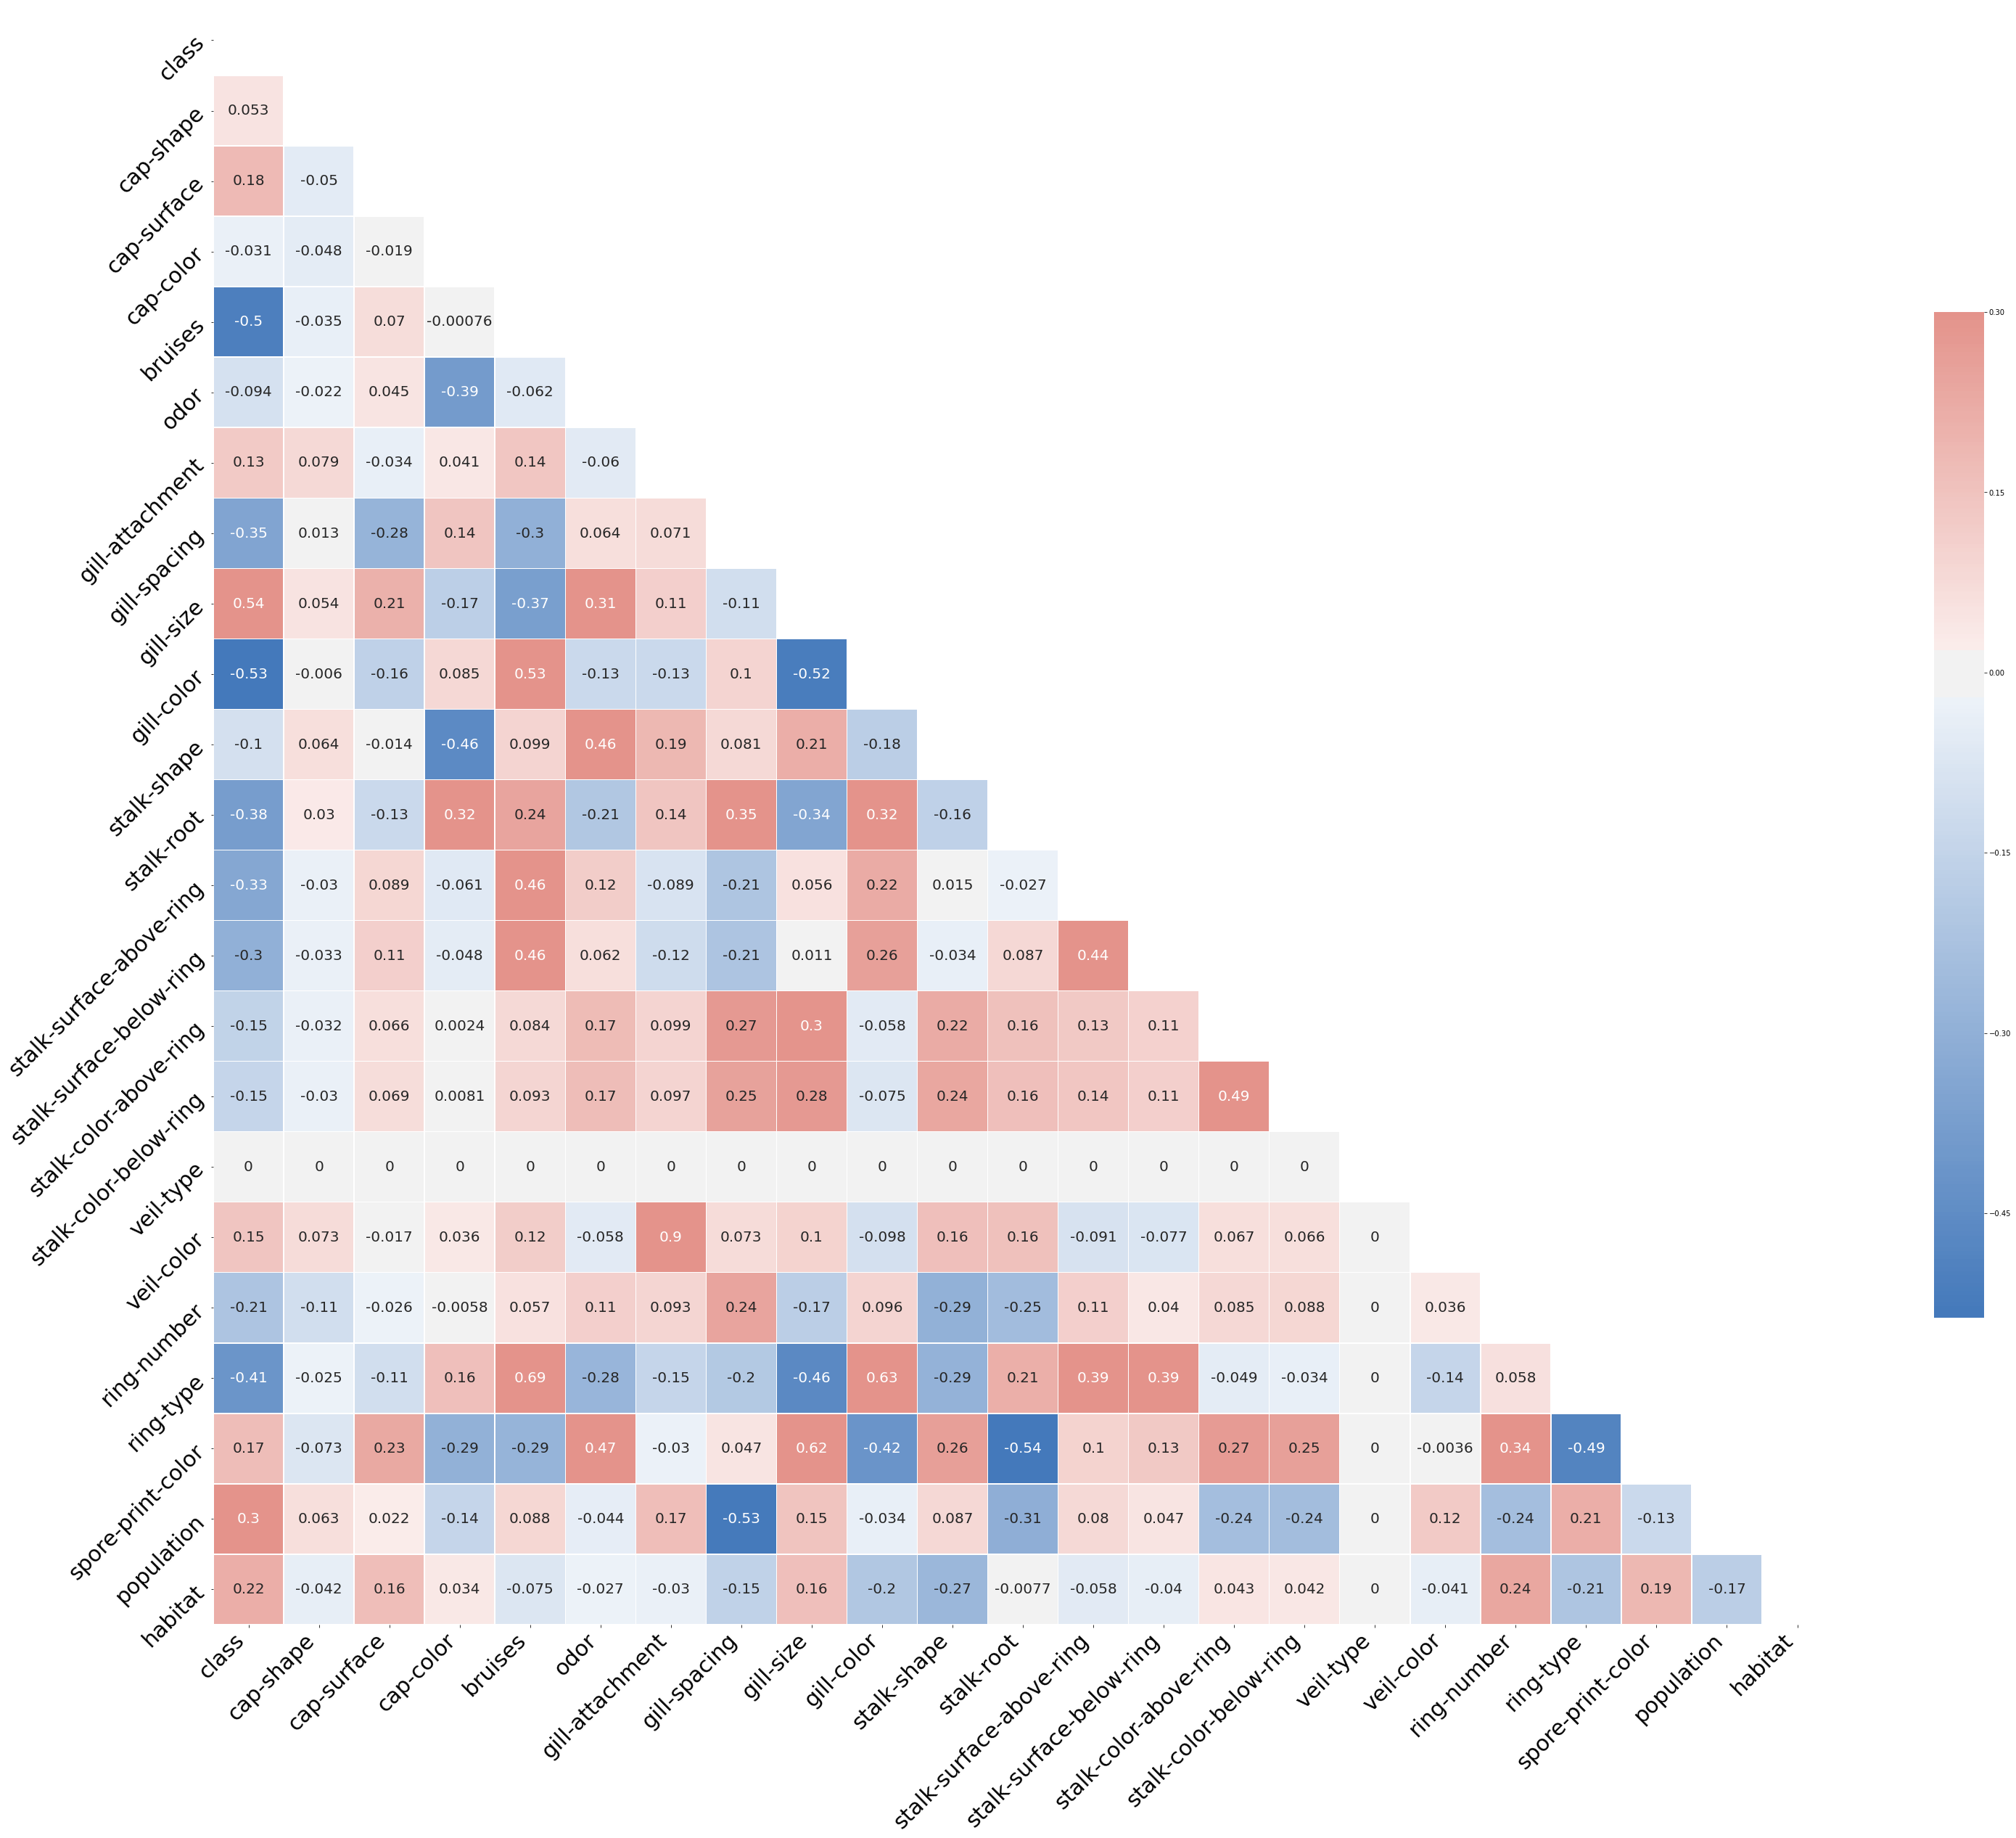

In [42]:
#lets visualize this correlation matrix as a heat map
# Set up the matplotlib figure

plot_correlationMatrix(corr_matrix,50,51,True)

As we can see that the gill-size, population, habitat, have strong positive correlation on the dependency class.
Parameters of Bruises,gill-color,ring-type,stalk root have strong negative correlation.

Using the matrix we can also see that there is some coorelation between the independent parameters as well.
For example, gill-color and gill-size are strongly negatively correlated. Spore-print-color and odor are strongly correlated. This poses a problem of multicollinearity and can affect the classification. Hence, we need to address this.

We need to include only those parameters which affect the class variable and also are independent or uncorelated to each other.
For this we choose have to add/delete parameters such that we get the required variance that is able to explain the data on which we are training and at the same time isn't too biased by being simplistic.

For this we choose to perform the PCA or Principal Component Analysis which does the job for us.


In [18]:
#first we scale the data in the mushrrom df as PCA needs standardised data. We use the min max scaler for this.

minMaxScaler=MinMaxScaler()
X=mushroom_df.drop('class',axis=1)
X=minMaxScaler.fit_transform(X)
y=mushroom_df['class']

In [19]:
pca=PCA(n_components=0.99)
pca.fit(X)
reduced_df=pca.transform(X)

In [20]:
reduced_df.shape

(8124, 18)

In [ ]:
abs(pca.components_[0])

In [21]:
run_ml_models(reduced_df,y)

Logistic Regression Classifier Metrics
---------------------------
Recall Score:0.9326625386996904
Precision Score:0.9647718174539631
F1 Score:0.9484454939000393
Accuracy Score:0.9511376352107422
---------------------------
Naive Bayes Classifier Metrics
---------------------------
Recall Score:0.8707430340557275
Precision Score:0.9566326530612245
F1 Score:0.9116693679092382
Accuracy Score:0.9186870570682582
---------------------------
Support Vector Machine Metrics
---------------------------


C:\Users\nikkh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikkh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Recall Score:0.9620743034055728
Precision Score:0.9826086956521739
F1 Score:0.9722330856472429
Accuracy Score:0.9735173442745244
---------------------------
Descision Tree Classfier Metrics
---------------------------
Recall Score:0.9945820433436533
Precision Score:0.9922779922779923
F1 Score:0.9934286818708928
Accuracy Score:0.9936590824319284
---------------------------
Random Forest Classifier Metrics
---------------------------
Recall Score:0.9984520123839009
Precision Score:0.9984520123839009
F1 Score:0.9984520123839009
Accuracy Score:0.9985080193957478
---------------------------


C:\Users\nikkh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
#Now lets see the one hot encoding techniques to encode the categorical data.
oneHotEncoded_X=mushroom_df.drop('class',axis=1)
oneHotEncoded_y=mushroom_df['class']
oneHotEncoded_X=pd.get_dummies(oneHotEncoded_X,columns=oneHotEncoded_X.columns)

In [23]:
oneHotEncoded_X.shape

(8124, 117)

As we can see that the one Hot Encoding has 117 columns in it. Which is more than the previously 23 columns. This is because one hot encoding creates a column for each category in the categorical variable.
Now lets check if these added columns have created any multicollinearity isssues for us.


In [49]:
oneHotCorrelationMatrix=oneHotEncoded_X.corr()
oneHotCorrelationMatrix

,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_0,cap-surface_1,cap-surface_2,cap-surface_3,...,population_3,population_4,population_5,habitat_0,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
cap-shape_0,1.000000,-0.005387,-0.193260,-0.081769,-0.015264,-0.219564,-0.091638,0.018820,0.117712,-0.027947,...,0.158702,-0.168381,-0.120154,-0.182037,0.149151,0.010113,0.374316,-0.095178,-0.052871,-0.037764
cap-shape_1,-0.005387,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,-0.014032,0.249631,-0.015038,0.015893,...,-0.009456,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453
cap-shape_2,-0.193260,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,0.064801,-0.006285,-0.093397,0.029076,...,-0.075804,0.034625,0.111346,0.074986,-0.017982,-0.052326,-0.129312,0.021891,0.030636,-0.017450
cap-shape_3,-0.081769,-0.007477,-0.268226,1.000000,-0.021185,-0.304733,-0.158942,0.010863,0.137988,0.015261,...,-0.089360,0.172707,-0.170081,-0.089230,-0.113404,0.235108,-0.065047,0.090538,-0.073380,0.119003
cap-shape_4,-0.015264,-0.001396,-0.050070,-0.021185,1.000000,-0.056884,0.099464,-0.001396,-0.042607,-0.051272,...,-0.026791,0.000341,0.044603,-0.050018,-0.037702,-0.021242,-0.012142,-0.025458,0.288697,-0.009784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_2,0.010113,0.065707,-0.052326,0.235108,-0.021242,-0.096639,-0.191987,0.065707,0.190799,-0.006819,...,-0.143906,0.248675,-0.174539,-0.268668,-0.202512,1.000000,-0.065222,-0.136749,-0.073577,-0.052553
habitat_3,0.374316,-0.004286,-0.129312,-0.065047,-0.012142,-0.004529,-0.122077,-0.004286,0.077081,0.039697,...,0.152473,-0.144434,-0.099772,-0.153579,-0.115762,-0.065222,1.000000,-0.078170,-0.042059,-0.030041
habitat_4,-0.095178,-0.008985,0.021891,0.090538,-0.025458,-0.029042,-0.086727,-0.008985,-0.039574,0.117915,...,-0.125366,0.169228,0.040714,-0.322005,-0.242715,-0.136749,-0.078170,1.000000,-0.088184,-0.062986
habitat_5,-0.052871,-0.004835,0.030636,-0.073380,0.288697,0.002845,-0.011913,-0.004835,0.117548,-0.100248,...,0.130450,0.001180,-0.042888,-0.173254,-0.130592,-0.073577,-0.042059,-0.088184,1.000000,-0.033889


In [46]:
plot_correlationMatrix(oneHotCorrelationMatrix,201,202,False)

Even though the heatmap isn't very clear, we can see that there is some strong negative correlation between some of the parameters. This can pose an issue of multicollinearity. Hence we perform the PCA on this matrix as well.

In [26]:
pca=PCA(n_components=0.99)
pca.fit(oneHotEncoded_X)
one_hot_encoded_reduced_df=pca.transform(oneHotEncoded_X)

In [27]:
one_hot_encoded_reduced_df.shape

(8124, 57)

In [48]:
abs(pca.components_[0])

array([2.92388779e-02, 3.70718259e-06, 5.11907018e-03, 7.91345981e-02,
       1.26724279e-03, 4.35057000e-02, 7.03588033e-02, 2.39738991e-04,
       4.02172679e-02, 3.03812744e-02, 8.09120502e-03, 8.96705123e-04,
       6.14899157e-02, 3.64543198e-02, 3.44653231e-02, 6.06064637e-03,
       3.62190809e-04, 3.62190809e-04, 5.77040850e-02, 1.07339306e-02,
       2.80686981e-01, 2.80686981e-01, 3.52540468e-02, 7.53791603e-03,
       1.47971279e-01, 3.52540468e-02, 1.50806676e-03, 2.07009039e-01,
       1.57277866e-02, 7.56517446e-02, 7.56517446e-02, 1.45601481e-03,
       1.45601481e-03, 3.63169943e-02, 3.63169943e-02, 2.02078485e-01,
       2.02078485e-01, 2.29632712e-01, 1.55336765e-03, 1.11800243e-02,
       1.89599264e-02, 2.29453646e-02, 7.64946804e-02, 6.33531947e-04,
       3.98236829e-02, 2.09092341e-03, 4.27591950e-02, 7.38833920e-02,
       4.11475044e-04, 1.73884168e-02, 1.73884168e-02, 2.23791911e-01,
       1.17515598e-01, 4.73266879e-02, 4.39645520e-02, 1.49850731e-02,
      

As we can see that PCA has reduced the parameters or columns to almost half of it thus decreasing the effect of multicollinearity issue and only keeping variables which are independent.
Now lets apply this data against all the 

In [29]:
run_ml_models(one_hot_encoded_reduced_df,oneHotEncoded_y)

Logistic Regression Classifier Metrics
---------------------------
Recall Score:1.0
Precision Score:1.0
F1 Score:1.0
Accuracy Score:1.0
---------------------------
Naive Bayes Classifier Metrics
---------------------------
Recall Score:0.958204334365325
Precision Score:0.862116991643454
F1 Score:0.907624633431085
Accuracy Score:0.9060052219321149
---------------------------
Support Vector Machine Metrics
---------------------------


C:\Users\nikkh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikkh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Recall Score:0.9961300309597523
Precision Score:1.0
F1 Score:0.9980612640558356
Accuracy Score:0.9981350242446848
---------------------------
Descision Tree Classfier Metrics
---------------------------
Recall Score:0.9953560371517027
Precision Score:1.0
F1 Score:0.9976726144297905
Accuracy Score:0.9977620290936218
---------------------------
Random Forest Classifier Metrics
---------------------------


C:\Users\nikkh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Recall Score:0.9992260061919505
Precision Score:1.0
F1 Score:0.9996128532713898
Accuracy Score:0.999627004848937
---------------------------


References
https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
https://matplotlib.org/tutorials/text/text_intro.html
https://seaborn.pydata.org/examples/many_pairwise_correlations.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/